In [1]:
# set up the python
import cosima_cookbook as cc
from dask.distributed import Client
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import numpy as np
import xarray as xr
import cmocean as cm
import cartopy.crs as ccrs
import cmocean as cm
import cartopy.feature as cft
import cftime
import IPython.display
import sys, os, warnings

In [2]:
client = Client()
client

distributed.diskutils - INFO - Found stale lock file and directory '/jobfs/36506590.gadi-pbs/dask-worker-space/worker-wpdk_xa5', purging
distributed.diskutils - INFO - Found stale lock file and directory '/jobfs/36506590.gadi-pbs/dask-worker-space/worker-3jx5tlo8', purging
distributed.diskutils - INFO - Found stale lock file and directory '/jobfs/36506590.gadi-pbs/dask-worker-space/worker-xl_mx8g4', purging
distributed.diskutils - INFO - Found stale lock file and directory '/jobfs/36506590.gadi-pbs/dask-worker-space/worker-usqyg11d', purging


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 4
Total threads: 8,Total memory: 32.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:40887,Workers: 4
Dashboard: /proxy/8787/status,Total threads: 8
Started: Just now,Total memory: 32.00 GiB
Comm: tcp://127.0.0.1:41753,Total threads: 2
Dashboard: /proxy/42059/status,Memory: 8.00 GiB
Nanny: tcp://127.0.0.1:37977,


In [3]:
session = cc.database.create_session()

In [6]:
# control experiment
umo_con = cc.querying.getvar(expt='jra55v13_ryf8485', variable='tx_trans', 
                          session=session, frequency='1 monthly',
                          start_time='1937-04-30 00:00:00', 
                          end_time='1947-05-31 00:00:00').sel(yt_ocean = slice(-90,-50))

In [7]:
# melting experiment at RCP8.5
umo_melt = cc.querying.getvar(expt='jra55v13_ryf8485_freshRCP85', variable='tx_trans', 
                          session=session, frequency='1 monthly',
                          start_time='1937-04-30 00:00:00', 
                          end_time='1947-05-31 00:00:00').sel(yt_ocean = slice(-90,-50))

In [9]:
# set time period
start_time = '1943-01-01'
end_time = '1947-01-01'

In [10]:
# calculate the zonal transport
flux1 = (umo_con.sel(time = slice(start_time,end_time)).mean('time').cumsum('yt_ocean').sum('st_ocean')/1e9).load()
flux2 = (umo_melt.sel(time = slice(start_time,end_time)).mean('time').cumsum('yt_ocean').sum('st_ocean')/1e9).load()

Text(0.5, 0, 'streamfunction (Sv)')

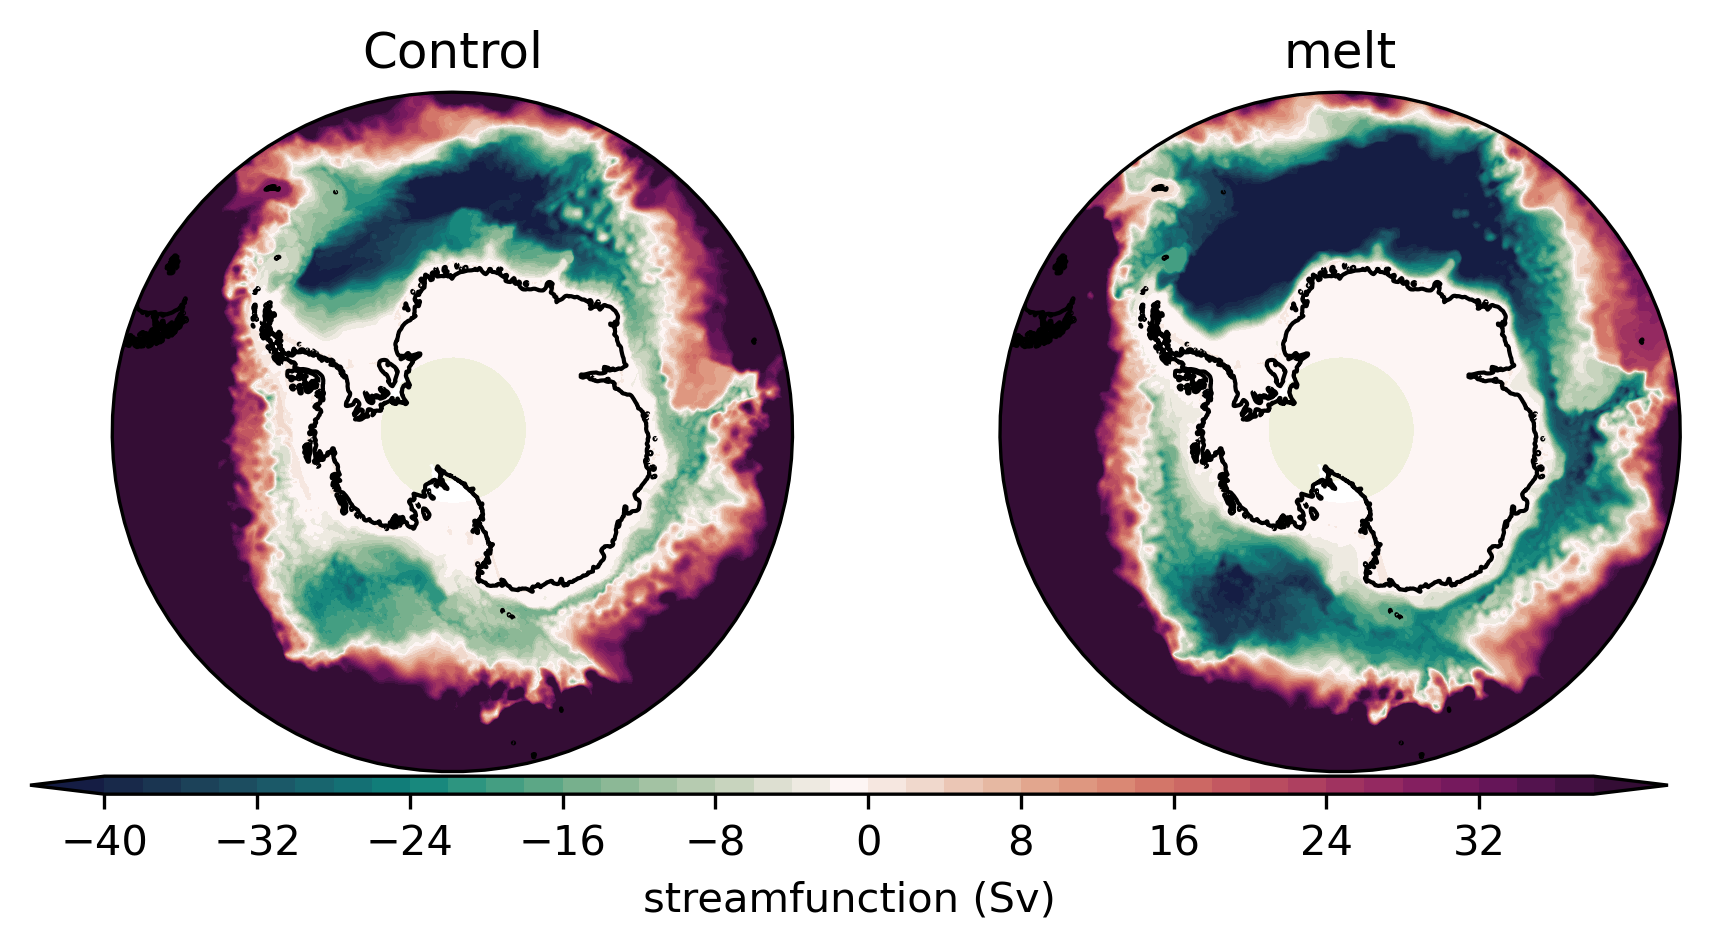

In [13]:
# plot the total flux and anomalies 
projection=ccrs.SouthPolarStereo()
fig = plt.figure(figsize=(7, 3), dpi=300)
# control
ax = plt.subplot(1,2,1,projection = projection)
theta = np.linspace(0,2*np.pi,100)
center,radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
p1 = flux1.plot.contourf(ax=ax, levels = np.arange(-40,40,2),transform=ccrs.PlateCarree(),
                              cmap=cm.cm.curl, add_colorbar = False)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-280,80,-82,-50], crs = ccrs.PlateCarree())
ax.set_title('Control')

# melt
ax = plt.subplot(1,2,2,projection = projection)
theta = np.linspace(0,2*np.pi,100)
center,radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
p2 = flux2.plot.contourf(ax=ax, levels = np.arange(-40,40,2),transform=ccrs.PlateCarree(),
                              cmap=cm.cm.curl, add_colorbar = False)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-280,80,-82,-50], crs = ccrs.PlateCarree())
ax.set_title('melt')

# add the colorbar
ax = plt.axes([0.1, 0.1, 0.78, 0.02])
cb = plt.colorbar(p1, cax=ax, orientation='horizontal',extend = 'both')
cb.ax.set_xlabel('streamfunction (Sv)')

# density layers

In [15]:
# control experiment
umo_con = cc.querying.getvar(expt='jra55v13_ryf8485', variable='tx_trans_rho', 
                          session=session, frequency='1 monthly',
                          start_time='1937-04-30 00:00:00', 
                          end_time='1947-05-31 00:00:00').sel(grid_yt_ocean = slice(-90,-50))

In [16]:
# melting experiment at RCP8.5
umo_melt = cc.querying.getvar(expt='jra55v13_ryf8485_freshRCP85', variable='tx_trans_rho', 
                          session=session, frequency='1 monthly',
                          start_time='1937-04-30 00:00:00', 
                          end_time='1947-05-31 00:00:00').sel(grid_yt_ocean = slice(-90,-50))

In [17]:
# upper density layer transport
umo_con1 = (umo_con.sel(time =slice(start_time,end_time)).sel(potrho = slice(0,1037.10)).mean('time').cumsum('grid_yt_ocean').sum('potrho')/1e9).load()
umo_melt1 =(umo_melt.sel(time =slice(start_time,end_time)).sel(potrho = slice(0,1037.10)).mean('time').cumsum('grid_yt_ocean').sum('potrho')/1e9).load()
# bottom depth layer transport
umo_con2 = (umo_con.sel(time =slice(start_time,end_time)).sel(potrho = slice(1037.10,2000.)).mean('time').cumsum('grid_yt_ocean').sum('potrho')/1e9).load()
umo_melt2 = (umo_melt.sel(time =slice(start_time,end_time)).sel(potrho = slice(1037.10,2000.)).mean('time').cumsum('grid_yt_ocean').sum('potrho')/1e9).load()

Text(0.5, 0, 'streamfunction (Sv)')

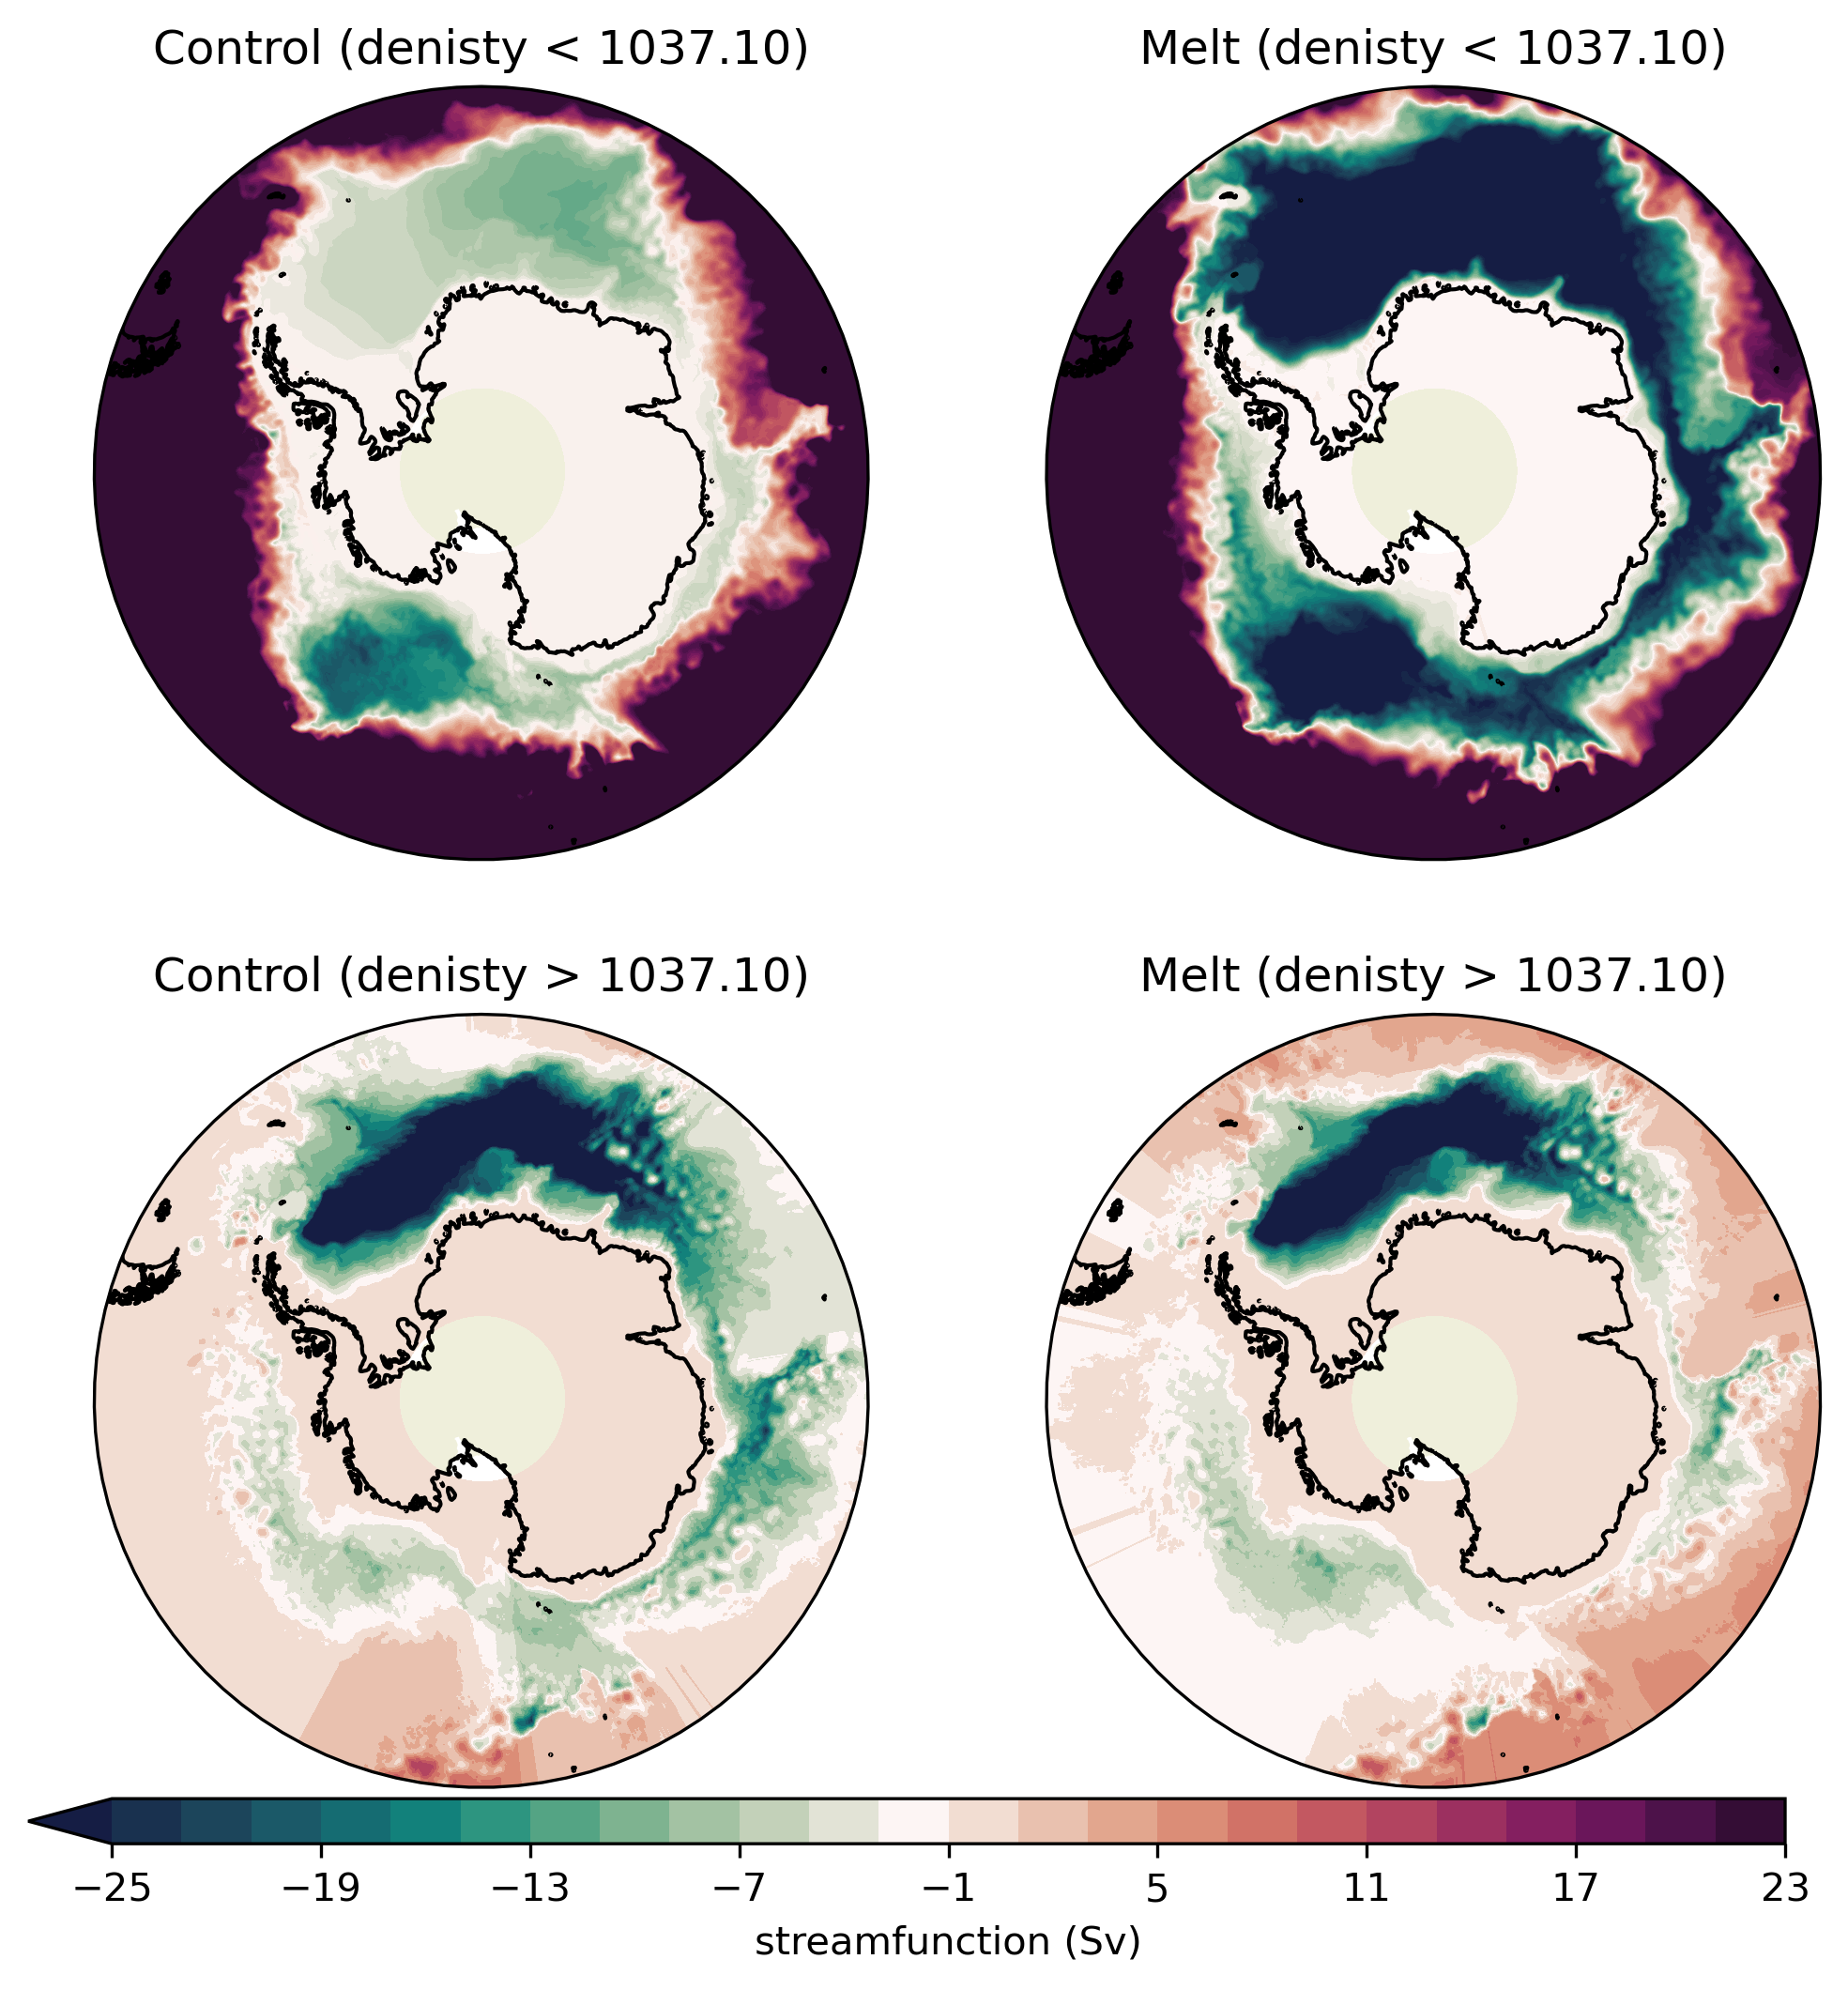

In [19]:
# plot the total flux and anomalies 
projection=ccrs.SouthPolarStereo()
fig = plt.figure(figsize=(8, 8), dpi=300)
# control
ax = plt.subplot(2,2,1,projection = projection)
theta = np.linspace(0,2*np.pi,100)
center,radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
p1 = umo_con1.plot.contourf(ax=ax, levels = np.arange(-25,25,1),transform=ccrs.PlateCarree(),
                              cmap=cm.cm.curl, add_colorbar = False)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-280,80,-82,-50], crs = ccrs.PlateCarree())
ax.set_title('Control (denisty < 1037.10)')

# melt
ax = plt.subplot(2,2,2,projection = projection)
theta = np.linspace(0,2*np.pi,100)
center,radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
p2 = umo_melt1.plot.contourf(ax=ax, levels = np.arange(-25,25,1),transform=ccrs.PlateCarree(),
                              cmap=cm.cm.curl, add_colorbar = False)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-280,80,-82,-50], crs = ccrs.PlateCarree())
ax.set_title('Melt (denisty < 1037.10)')

# control
ax = plt.subplot(2,2,3,projection = projection)
theta = np.linspace(0,2*np.pi,100)
center,radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
p1 = umo_con2.plot.contourf(ax=ax, levels = np.arange(-25,25,2),transform=ccrs.PlateCarree(),
                              cmap=cm.cm.curl, add_colorbar = False)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-280,80,-82,-50], crs = ccrs.PlateCarree())
ax.set_title('Control (denisty > 1037.10)')

# melt
ax = plt.subplot(2,2,4,projection = projection)
theta = np.linspace(0,2*np.pi,100)
center,radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
p2 = umo_melt2.plot.contourf(ax=ax, levels = np.arange(-25,25,2),transform=ccrs.PlateCarree(),
                              cmap=cm.cm.curl, add_colorbar = False)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-280,80,-82,-50], crs = ccrs.PlateCarree())
ax.set_title('Melt (denisty > 1037.10)')

# add the colorbar
ax = plt.axes([0.1, 0.1, 0.78, 0.02])
cb = plt.colorbar(p1, cax=ax, orientation='horizontal',extend = 'both')
cb.ax.set_xlabel('streamfunction (Sv)')